<a href="https://colab.research.google.com/github/mldurga/projects/blob/master/wagon_shipment_reader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Wagon shipment no scanner

[PaddleOCR](https://github.com/PaddlePaddle/PaddleOCR) models used here for reading the wagon number. 

In [6]:
!pip install paddlepaddle paddleocr Gradio -Uqq

     |████████████████████████████████| 900 kB 5.3 MB/s 
     |████████████████████████████████| 210 kB 56.9 MB/s 
     |████████████████████████████████| 961 kB 49.3 MB/s 
     |████████████████████████████████| 63 kB 2.5 MB/s 
     |████████████████████████████████| 3.6 MB 47.5 MB/s 


In [7]:
from paddleocr import PaddleOCR
from PIL import Image
import gradio as gr
import torch
import re

region={'CR', 'KR', 'NR', 'NCR', 'NER', 'NFR', 'NWR', 'ER', 'ECR', 'ECOR',
       'SR', 'SCR', 'SCOR', 'SER', 'SECR', 'SWR', 'WR', 'WCR'}
wagon={'steel_wagon':['BFNS','BOST','BOSTHS','BOXN','BRN','BRNA','BRNAHS'],'brake_van':['BVCM','BVZC','BVZI']}
def wagon_num(num):
  x=[]
  for i in range(len(num)):
    if len(num[i])!=11:
      o=i
      while o<(len(num)-1):
        if len(num[i]+num[o+1])==11:
          x.append(num[i]+num[o+1])
        o+=1
    else:x.append(num[i])
  return x 
 
def predict(img):
   ocr = PaddleOCR(use_angle_cls=True, lang='en',use_gpu=False)
   img_path=img
   result = ocr.ocr(img_path, cls=True)
   outs = [line[1][0] for line in result]
   txts=[item.upper() for sublist in [re.findall("[a-zA-Z]+",o) for o in outs] for item in sublist]
   num=[item for sublist in [re.findall(r'\d+',o) for o in outs] for item in sublist]
   rail_region=set(x if x in region else '' for x in txts)
   wagon=wagon_num(num)
   print(f'wagon number:{wagon[0] if len(wagon)>0 else None}')
   print(rail_region)
   return {'wagon_number':{wagon[0] if len(wagon)>0 else None}, 'region':rail_region, 'texts':txts,'nums':num }

## Download Image files

In [13]:
!wget https://user-images.githubusercontent.com/19243618/147801374-0915efba-943d-4811-866e-b00fd0a961e4.jpeg 
!wget https://user-images.githubusercontent.com/19243618/147801504-66b17664-ef45-48e1-9f20-fc077d66676a.jpeg 
!wget https://user-images.githubusercontent.com/19243618/147801523-1d33a350-167d-406a-a8aa-4d67d28e3f9b.jpeg 
!wget https://user-images.githubusercontent.com/19243618/147801534-17340205-5600-4e76-9cb1-1b47c0f140b2.jpeg 
!wget https://user-images.githubusercontent.com/19243618/147801565-c3731a50-9eda-430b-97ce-bfb2433e9b5d.jpeg 
!wget https://user-images.githubusercontent.com/19243618/147801590-dce11c1a-d8bd-47f9-aa43-28f8ce471d4e.jpeg 
!wget https://user-images.githubusercontent.com/19243618/147801613-1e7b6cbb-24b1-4074-a6a0-c332e40b7b6c.jpeg 
!wget https://user-images.githubusercontent.com/19243618/147801637-921474aa-ce39-4144-afca-e8910c5d1438.jpeg 
!wget https://user-images.githubusercontent.com/19243618/147801681-1eaf53dc-f6b4-4a46-9048-633681a5c0ed.jpeg 
!wget https://user-images.githubusercontent.com/19243618/147801703-452cc054-98c2-40e4-9585-5b356c5ccb5f.jpeg 

### Good Images

Regions and numbers are recognised

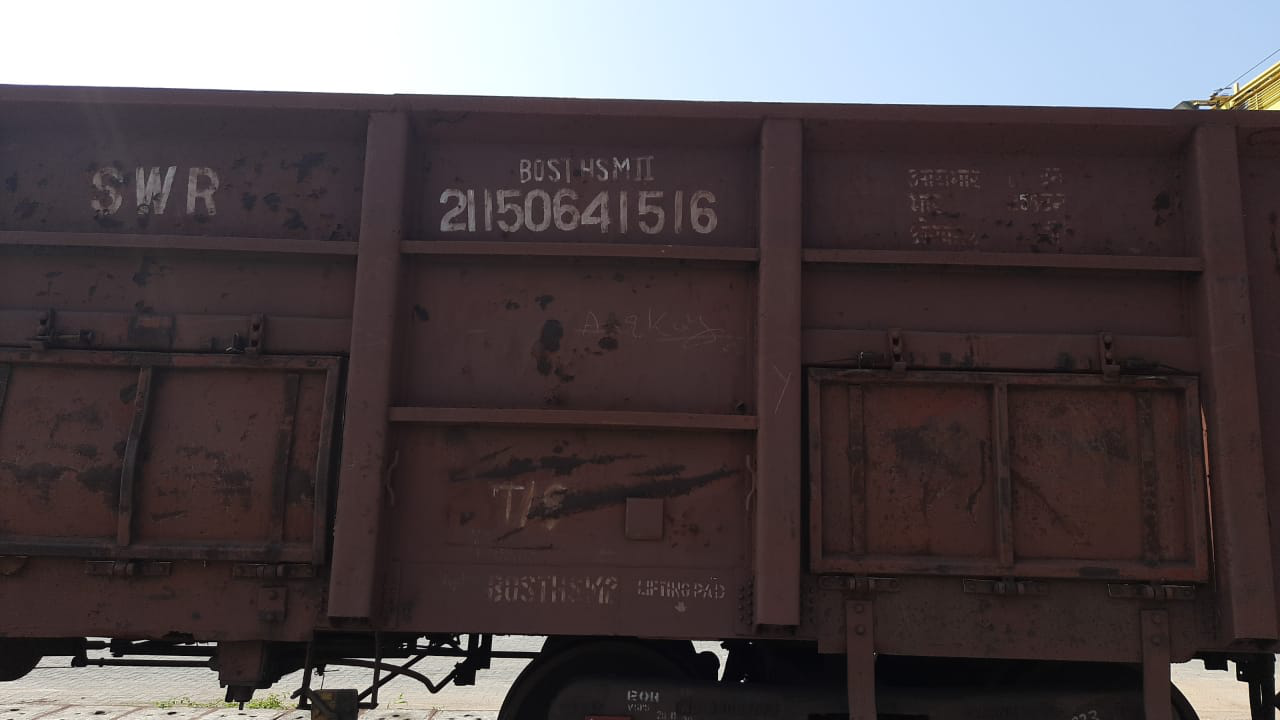

In [34]:
Image.open('/content/147801374-0915efba-943d-4811-866e-b00fd0a961e4.jpeg')

In [18]:
predict('/content/147801374-0915efba-943d-4811-866e-b00fd0a961e4.jpeg')



[2021/12/31 03:42:40] root WARNING: lang en is not support in PP-OCRv2, auto switch to version PP-OCR
[2021/12/31 03:42:40] root WARNING: lang en is not support in PP-OCRv2, auto switch to version PP-OCR
[2021/12/31 03:42:40] root WARNING: version PP-OCRv2 not support cls models, auto switch to version PP-OCR
Namespace(benchmark=False, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/root/.paddleocr/2.3.0.2/ocr/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, det=True, det_algorithm='DB', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/root/.paddleocr/2.3.0.2/ocr/det/en/en_ppocr_mobile_v2.0_det_infer', det_pse_box_thresh=0.85, det_pse_box_type='box', det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_polygon=False, det_sast_score_t

{'nums': ['2115064516', '78'],
 'region': {'', 'SWR'},
 'texts': ['SWR', 'BUSIHSMII'],
 'wagon_number': {None}}

IF no obstruction recognition efficiencey is good

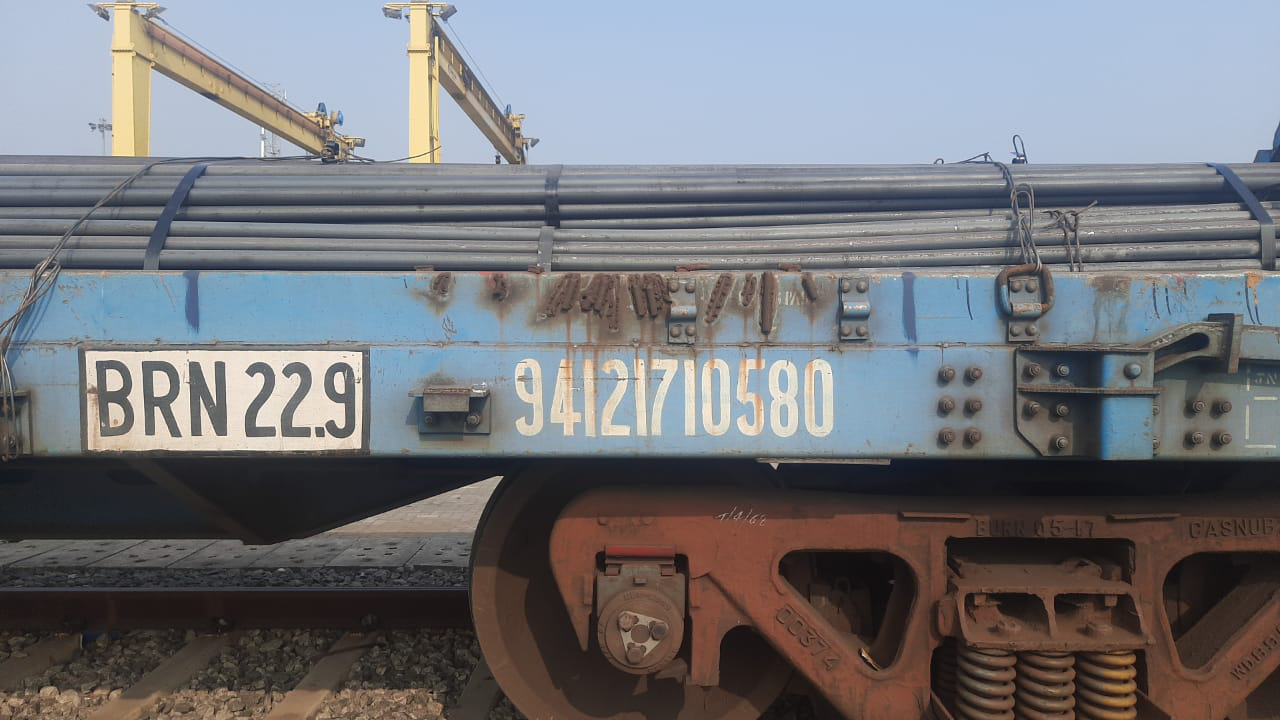

In [35]:
Image.open('/content/147801703-452cc054-98c2-40e4-9585-5b356c5ccb5f.jpeg')

In [19]:
predict('/content/147801703-452cc054-98c2-40e4-9585-5b356c5ccb5f.jpeg')

[2021/12/31 03:46:06] root WARNING: lang en is not support in PP-OCRv2, auto switch to version PP-OCR
[2021/12/31 03:46:06] root WARNING: lang en is not support in PP-OCRv2, auto switch to version PP-OCR
[2021/12/31 03:46:06] root WARNING: version PP-OCRv2 not support cls models, auto switch to version PP-OCR
Namespace(benchmark=False, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/root/.paddleocr/2.3.0.2/ocr/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, det=True, det_algorithm='DB', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/root/.paddleocr/2.3.0.2/ocr/det/en/en_ppocr_mobile_v2.0_det_infer', det_pse_box_thresh=0.85, det_pse_box_type='box', det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_polygon=False, det_sast_score_t

{'nums': ['229', '94121710580'],
 'region': {''},
 'texts': ['BRN'],
 'wagon_number': {'94121710580'}}

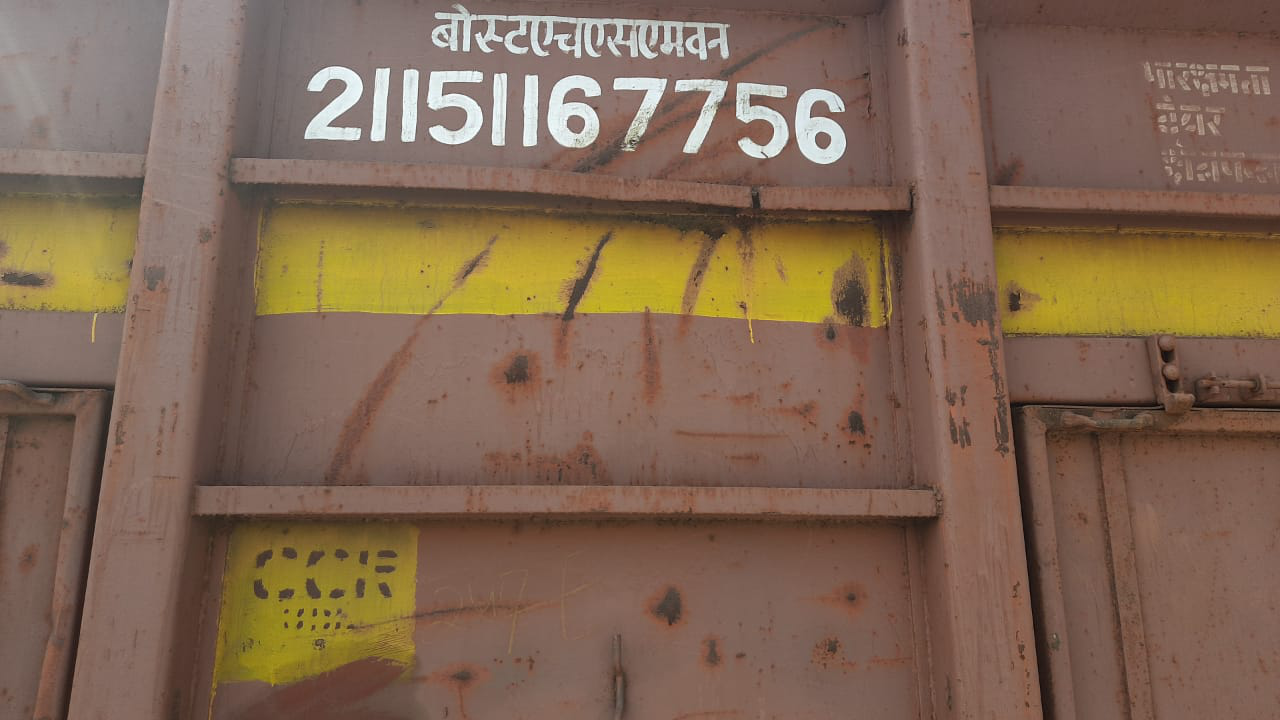

In [25]:

predict('/content/147801565-c3731a50-9eda-430b-97ce-bfb2433e9b5d.jpeg')

[2021/12/31 03:50:21] root WARNING: lang en is not support in PP-OCRv2, auto switch to version PP-OCR
[2021/12/31 03:50:21] root WARNING: lang en is not support in PP-OCRv2, auto switch to version PP-OCR
[2021/12/31 03:50:21] root WARNING: version PP-OCRv2 not support cls models, auto switch to version PP-OCR
Namespace(benchmark=False, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/root/.paddleocr/2.3.0.2/ocr/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, det=True, det_algorithm='DB', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/root/.paddleocr/2.3.0.2/ocr/det/en/en_ppocr_mobile_v2.0_det_infer', det_pse_box_thresh=0.85, det_pse_box_type='box', det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_polygon=False, det_sast_score_t

{'nums': ['478757', '21151167756', '2212'],
 'region': set(),
 'texts': [],
 'wagon_number': {'21151167756'}}

In [33]:
title = "Wagon Shipment No"
description = "testing wagon_reader"
interpretation='default'
# examples = ['wag2.jpeg']
enable_queue=True
gr.Interface(fn=predict,inputs=gr.inputs.Image(shape=(512, 512)),outputs=gr.outputs.Textbox(type="str", label=None),title=title,description=description,interpretation=interpretation,enable_queue=enable_queue).launch(debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://15897.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


[2021/12/31 04:24:49] root WARNING: lang en is not support in PP-OCRv2, auto switch to version PP-OCR
[2021/12/31 04:24:49] root WARNING: lang en is not support in PP-OCRv2, auto switch to version PP-OCR
[2021/12/31 04:24:49] root WARNING: version PP-OCRv2 not support cls models, auto switch to version PP-OCR
Namespace(benchmark=False, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/root/.paddleocr/2.3.0.2/ocr/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, det=True, det_algorithm='DB', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/root/.paddleocr/2.3.0.2/ocr/det/en/en_ppocr_mobile_v2.0_det_infer', det_pse_box_thresh=0.85, det_pse_box_type='box', det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_polygon=False, det_sast_score_t

KeyboardInterrupt: ignored